In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import vmo
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from __future__ import division
import librosa

%matplotlib inline

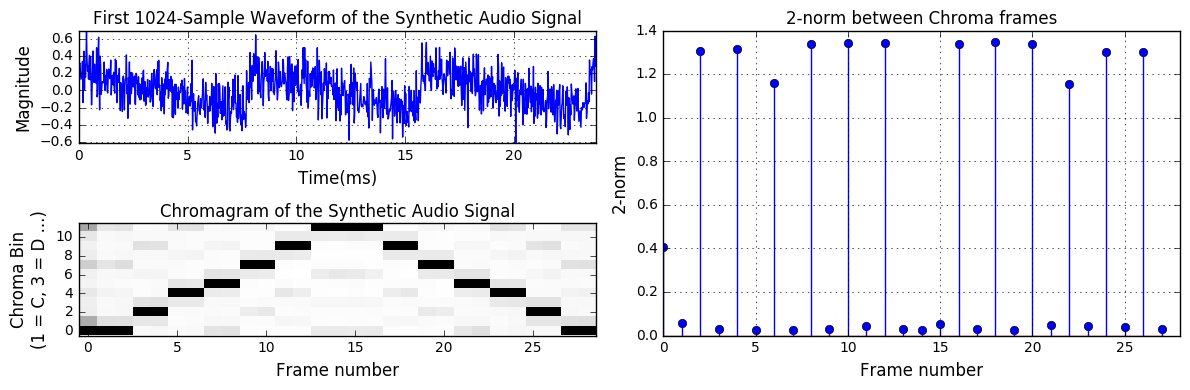

In [4]:
filename = '../files/hmmtesttoneNoise.wav'
fft_size = 8192
hop_size = fft_size

y, sr = librosa.load(filename)
chroma = librosa.feature.chromagram(y=y, sr=sr, n_fft=fft_size, hop_length=hop_size)

fs, x = wav.read(filename)
x = x/(2**15.0)

fig = plt.figure(figsize = (12,4))
plt.subplot2grid((2,2),(0,0))
plt.plot(np.arange(1024)*(1024.0/44100),x[:1024])
plt.title('First 1024-Sample Waveform of the Synthetic Audio Signal', fontsize = 12)
plt.xlabel('Time(ms)', fontsize = 12)
plt.ylabel('Magnitude', fontsize = 12)
plt.axis('tight')
plt.grid(b = True)

plt.subplot2grid((2,2),(1,0))
plt.imshow(chroma, aspect = 'auto', origin = 'lower', interpolation = 'nearest', cmap ='Greys')
plt.title('Chromagram of the Synthetic Audio Signal', fontsize = 12)
plt.xlabel('Frame number', fontsize = 12)
plt.ylabel('Chroma Bin\n(1 = C, 3 = D ...)', fontsize = 12)
fig.tight_layout()

plt.subplot2grid((2,2),(0,1),rowspan=2)
plt.stem(np.sqrt(np.sum(np.diff(chroma)**2,0)))
plt.grid(b = 'on')
plt.xlim((0, chroma.shape[1]-1))
plt.title('2-norm between Chroma frames', fontsize = 12)
plt.xlabel('Frame number', fontsize = 12)
plt.ylabel('2-norm', fontsize = 12)
plt.tight_layout()

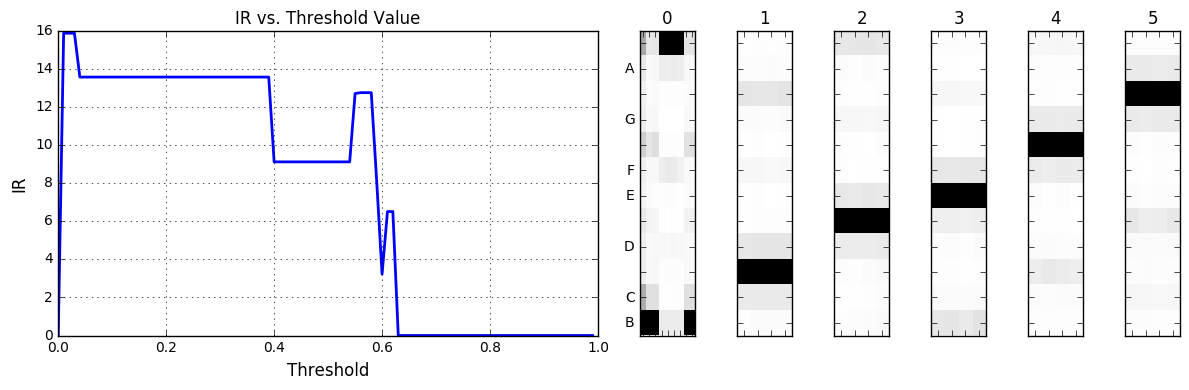

In [6]:
chroma_frames = chroma.transpose()
r = (0.0, 1.0, 0.01) 
ideal_t = vmo.find_threshold(chroma_frames, r, dim=12, dfunc='euclidean')
oracle = vmo.build_oracle(chroma_frames, flag = 'a', 
                            threshold = 0.5, 
                            feature = 'chroma', dim=12)
x_a = [i[1] for i in ideal_t[1]]
y_a = [i[0] for i in ideal_t[1]]

fig = plt.figure(figsize=(12,4))
plt.subplot2grid((1,len(oracle.latent)*2),(0,0), colspan = len(oracle.latent))
plt.plot(x_a, y_a, linewidth = 2)
plt.title('IR vs. Threshold Value', fontsize = 12)
plt.grid(b = 'on')
plt.xlabel('Threshold', fontsize = 12)
plt.ylabel('IR', fontsize = 12)

for i in range(len(oracle.latent)):
    plt.subplot2grid((1,len(oracle.latent)*2),(0,len(oracle.latent)+i))
    plt.title(str(i))
    plt.imshow(chroma.transpose()[[_i - 1 for _i in oracle.latent[i]]].transpose(), 
               aspect = 'auto',origin = 'lower', cmap = 'Greys', interpolation = 'nearest')
    plt.xticks(np.arange(len(oracle.latent[i])), [])
    if i == 0:
        plt.yticks(np.arange(12), ['B','C','','D','','E','F','','G','','A',''])
    else:
        plt.yticks(np.arange(12), [])
    plt.minorticks_off()
fig.tight_layout()

In [ ]:
print oracle.data[1:]